# WAVE

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import pickle
from imutils import build_montages
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from skimage import feature
from sklearn.metrics import confusion_matrix, accuracy_score

### Label Encoder

In [2]:
le = LabelEncoder()

### MODEL - KNeighbors Classifier

In [3]:
model = KNeighborsClassifier()

### Get Image Features

In [4]:
def get_features(image):
    features = feature.hog(image, orientations = 9, pixels_per_cell = (10,10),
                         cells_per_block = (2 , 2), transform_sqrt = True, block_norm = "L1")
    return features

### Images Paths

In [5]:
fp_wave_train_healthy = './Dataset/drawings/wave/training/healthy'
fp_wave_train_park = './Dataset/drawings/wave/training/parkinson'

wave_train_healthy = os.listdir(fp_wave_train_healthy)
wave_train_park = os.listdir(fp_wave_train_park)


fp_wave_test_healthy = './Dataset/drawings/wave/testing/healthy'
fp_wave_test_park = './Dataset/drawings/wave/testing/parkinson'

wave_test_healthy = os.listdir(fp_wave_test_healthy)
wave_test_park = os.listdir(fp_wave_test_park)

## Splitting into Dependent and Independent Data

In [6]:
trainX = []
testX = []
outputs = []
trainY = []
testY = []

## Function to Preprocess images

In [7]:
def preprocess_images(image, data):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (200, 200))
    image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    features = get_features(image)
    data.append(features)
    return data

### TRAINING DATA

In [8]:
for i in wave_train_healthy:
    image = cv2.imread(fp_wave_train_healthy + '/' + i)
    trainX = preprocess_images(image, trainX)
    trainY.append('healthy')

In [9]:
for i in wave_train_park:
    image = cv2.imread(fp_wave_train_park + '/' + i)
    trainX = preprocess_images(image, trainX)
    trainY.append('parkinson')

In [10]:
trainX = np.array(trainX)
trainY = np.array(trainY)

In [11]:
trainX

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.24999804, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.12675901, 0.        , 0.07381472, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [12]:
trainY

array(['healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson'], dtype='<U9')

### TESTING DATA

In [13]:
for i in wave_test_healthy:
    image = cv2.imread(fp_wave_test_healthy + '/' + i)
    outputs.append(image)
    testX = preprocess_images(image, testX)
    testY.append('healthy')

In [14]:
for i in wave_test_park:
    image = cv2.imread(fp_wave_test_park + '/' + i)
    outputs.append(image)
    testX = preprocess_images(image, testX)
    testY.append('parkinson')

In [15]:
testX = np.array(testX)
testY = np.array(testY)

In [16]:
testX

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
testY

array(['healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson'], dtype='<U9')

### Encoding

In [18]:
trainY = le.fit_transform(trainY)
testY = le.transform(testY)

In [19]:
trainY

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [20]:
testY

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

### Training The Model

In [21]:
wave_model = model.fit(trainX,trainY)

### Saving The Trained Model

In [22]:
wavepkl = open('./models/WAVE.pkl', 'wb') 
pickle.dump(wave_model, wavepkl)  
wavepkl.close()

### Model Prediction

In [23]:
pred = wave_model.predict(testX)
pred

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

## Model Evaluation

### Confusion Matrix

In [24]:
cnf = confusion_matrix(testY, pred)
cnf

array([[10,  5],
       [ 2, 13]], dtype=int64)

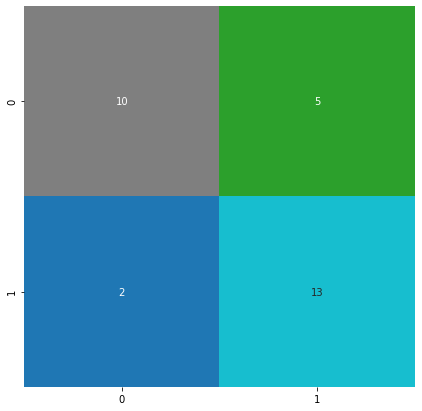

In [25]:
plt.figure(figsize = (7,7))
sns.heatmap(cnf , annot = True , cmap = "tab10" , cbar=False)
plt.show()

### Accuracy

In [26]:
acc = accuracy_score(testY, pred)
acc

0.7666666666666667

## Displaying Prediction Results

In [27]:
labels = []

for i in range(30):
    pred_i = le.inverse_transform(pred)[i]
    labels.append(pred_i)

In [28]:
labels

['healthy',
 'healthy',
 'healthy',
 'healthy',
 'parkinson',
 'parkinson',
 'healthy',
 'parkinson',
 'healthy',
 'parkinson',
 'healthy',
 'parkinson',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'healthy',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson']

In [29]:
results = []

for i in range(30):
    image = outputs[i]
    if labels[i] == 'healthy':
        color = (0,255,0)
    else:
        color = (0,0,255)
    text = str(labels[i])
    image = cv2.resize(image,(144,120))
    cv2.putText(image,text,(3,20), 0, 0.5, color, 2)
    results.append(image)

In [30]:
montage = build_montages(results,(144,120),(6,5))[0]

cv2.imshow('PNT2022TMID35637', montage)
cv2.waitKey(0)

-1